<center><h3>Primal Problem</h3></center><br>
$$
\begin{aligned}
& \underset{x}{\text{minimize}}
& & f(x) = x^2 + 1 \\
& \text{subject to}
& & (x-2)(x-4) \leq 0
\end{aligned}
$$
<br>

<center><h3>Primal Solution</h3> **(part a)**</center><br>
$$
\text{feasible set: } x \in [2,4]\\
x^* = 2,~~~ 
f(x^*) = p^* = 5
$$

In [1]:
import numpy as np
import pylab as plt
%matplotlib inline

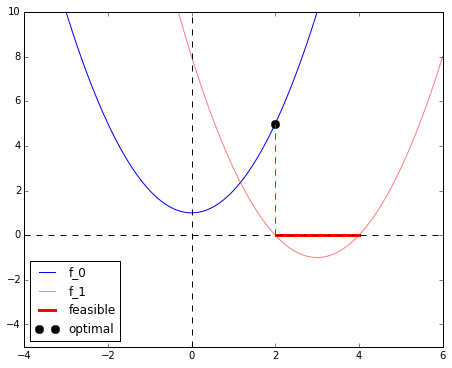

In [2]:
x = np.linspace(-6,6,1000)
f0 = x**2 + 1
f1 = (x-2)*(x-4)
D = f1 < 0  # feasible x

plt.figure(figsize=(7.5,6))
xlimits,ylimits = [-4,6],[-5,10]
plt.plot(x,f0,'-b')
plt.plot(x,f1,'-r',alpha=0.5)
plt.plot(x[D],np.zeros(sum(D)),'-r',lw=3)
plt.plot(2,5,'ok',ms=8)
plt.plot([2,2],[0,5],'--r',ms=8)
plt.legend(('f_0','f_1','feasible','optimal'),loc='lower left')
plt.plot(xlimits,[0,0],'--k')
plt.plot([0,0],ylimits,'--k')
plt.xlim(xlimits)
plt.ylim(ylimits)
plt.show()

<center><h3>Lagrangian function</h3> **(part b)**</center>

$$\mathcal{L}(x,\lambda) = x^2 + 1 + \lambda(x-2)(x-4)~,~~~~~ \lambda \geq 0$$

<center><h3>Dual function</h3></center>

$$g(\lambda) = \inf_{x \in \mathcal{D}} \left [ x^2 + 1 + \lambda(x-2)(x-4) \right ]$$

$$g(\lambda) = \inf_{x \in \mathcal{D}} \left [ (1+\lambda)x^2 - 6 \lambda x + 8\lambda + 1 \right ]$$

$$g(\lambda) = (1+\lambda) \left ( \frac{3 \lambda}{1 + \lambda} \right )^2 - \frac{18 \lambda^2}{1 + \lambda} + 8 \lambda + 1$$

$$g(\lambda) = \frac{-\lambda^2 + 9 \lambda + 1}{1 + \lambda}$$

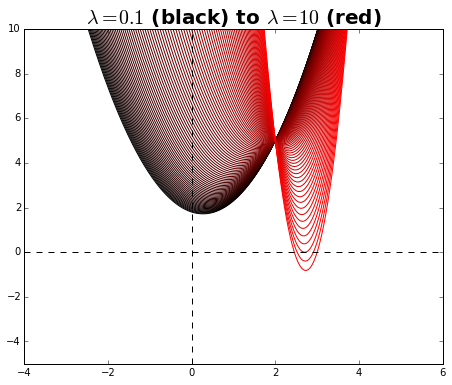

In [3]:
L = lambda x,k: x**2 + 1 + k*(x-2)*(x-4)

plt.figure(figsize=(7.5,6))
xlimits,ylimits = [-4,6],[-5,10]
N = 100
colors = np.array([np.linspace(0,1,N),np.zeros(N),np.zeros(N)])

for i,k in enumerate(np.logspace(-1,1,N)):
    plt.plot(x,L(x,k),'-',color=colors[:,i])
    
plt.plot(xlimits,[0,0],'--k')
plt.plot([0,0],ylimits,'--k')
plt.title('$\lambda = 0.1$ (black) to $\lambda=10$ (red)', fontweight='bold', fontsize=20)
plt.xlim(xlimits)
plt.ylim(ylimits)
plt.show()

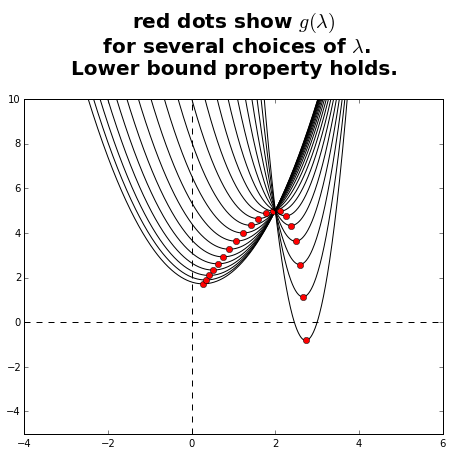

In [4]:
g = lambda k: (-k**2 + 9*k + 1)/(1+k)  # dual function

plt.figure(figsize=(7.5,6))
xlimits,ylimits = [-4,6],[-5,10]
N = 20

for i,k in enumerate(np.logspace(-1,1,N)):
    plt.plot(x,L(x,k),'-k')
    plt.plot(3*k/(1+k),g(k),'or')
    
plt.plot(xlimits,[0,0],'--k')
plt.plot([0,0],ylimits,'--k')
plt.title('red dots show $g(\lambda)$\n for several choices of $\lambda$.\nLower bound property holds.\n',fontsize=20,fontweight='bold')
plt.xlim(xlimits)
plt.ylim(ylimits)
plt.show()

<center><h3>Lagrange Dual Problem</h3> **(part c)**</center>

$$
\begin{aligned}
& \underset{\lambda}{\text{maximize}}
& & g(\lambda) = \frac{-\lambda^2 + 9 \lambda + 1}{1 + \lambda} \\
& \text{subject to}
& & \lambda \geq 0
\end{aligned}
$$

This is a concave maximization problem. The constraint set is clearly convex, and the objective function is a quadratic-over-linear function (with a negative quadratic).

Thus, to solve this we can calculate:

$$\frac{d}{d\lambda} \left [ \frac{-\lambda^2 + 9 \lambda + 1}{1 + x} \right ]= 0$$

$$ - \frac{\lambda^2 + 2 \lambda + 8}{(\lambda + 1)^2} = 0$$

$$ \lambda = 2$$

(We reject the solution $\lambda = -4$ since we have imposed $\lambda \geq 0$). The code below verifies that $\lambda = 2$ achieves $d^* = p^*$

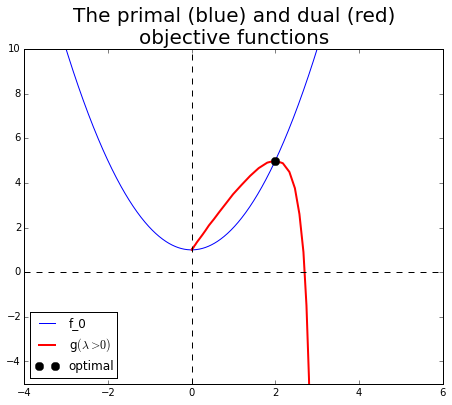

In [5]:
dual_x,dual_y = [],[]
for k in np.logspace(-10,2,100):
    dual_x.append(x[np.argmin(L(x,k))])
    dual_y.append(np.min(L(x,k)))
    
plt.figure(figsize=(7.5,6))
xlimits,ylimits = [-4,6],[-5,10]
plt.plot(x,f0,'-b')
plt.plot(dual_x,dual_y,'-r',lw=2)
plt.plot(2,g(2),'ok',ms=8)
    
plt.legend(('f_0','g$(\lambda > 0)$','optimal'),loc='lower left')
plt.title('The primal (blue) and dual (red)\nobjective functions',fontsize=20)

plt.plot(xlimits,[0,0],'--k')
plt.plot([0,0],ylimits,'--k')
plt.xlim(xlimits)
plt.ylim(ylimits)
plt.show()

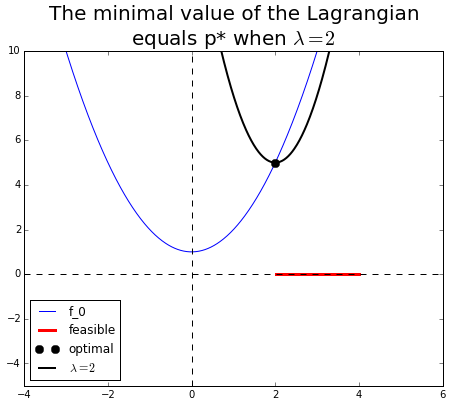

In [6]:
plt.figure(figsize=(7.5,6))
xlimits,ylimits = [-4,6],[-5,10]
plt.plot(x,f0,'-b')
plt.plot(x[D],np.zeros(sum(D)),'-r',lw=3)
plt.plot(2,g(2),'ok',ms=8)
plt.plot(x,L(x,2),'-',color='k',lw=2)
plt.legend(('f_0','feasible','optimal','$\lambda = 2$'),loc='lower left')
plt.title('The minimal value of the Lagrangian \nequals p* when $\lambda = 2$',fontsize=20)
plt.plot(xlimits,[0,0],'--k')
plt.plot([0,0],ylimits,'--k')
plt.xlim(xlimits)
plt.ylim(ylimits)
plt.show()

<center><h3>Sensitivity Analysis</h3> **(part d)**</center>

$$
\begin{aligned}
& \underset{x}{\text{minimize}}
& & f(x) = x^2 + 1 \\
& \text{subject to}
& & (x-2)(x-4) \leq u
\end{aligned}
$$
<br>

<center>**What happens as we change the parameter $u$?**</center>

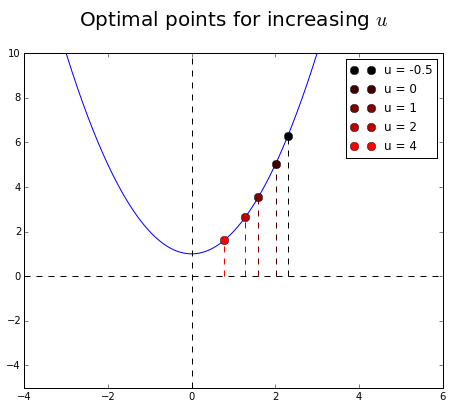

In [7]:
plt.figure(figsize=(7.5,6))
xlimits,ylimits = [-4,6],[-5,10]

plt.plot(x,f0,'-b')

colors = np.array([np.linspace(0,1,5),np.zeros(5),np.zeros(5)])

for j,u in enumerate([-0.5,0,1,2,4]):
    D = f1 < u  # feasible x
    i = np.argwhere(D)[0][0]
    plt.plot([x[i],x[i]],[0,f0[i]],'--',color=colors[:,j])
    plt.plot(x[i],f0[i],'o',ms=8,color=colors[:,j],label='u = '+str(u))
    
plt.legend()
plt.plot(xlimits,[0,0],'--k')
plt.plot([0,0],ylimits,'--k')
plt.title('Optimal points for increasing $u$\n',fontsize=20)
plt.xlim(xlimits)
plt.ylim(ylimits)

plt.show()

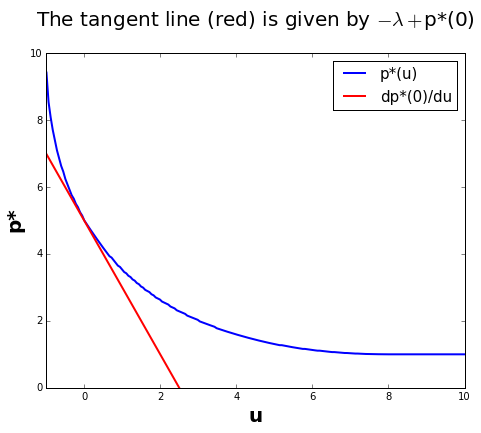

In [12]:
plt.figure(figsize=(7.5,6))
xlimits,ylimits = [-1,10],[0,10]

u = np.linspace(-0.99,10,200)
pstar = []
for uu in u:
    D = f1 < uu  # feasible x
    pstar.append(np.min(f0[D]))

plt.xlim(xlimits)
plt.ylim(ylimits)
plt.plot(u,pstar,'-b',lw=2)
plt.plot(u,-2*u+5,'-r',lw=2)
plt.legend(('p*(u)','dp*(0)/du'),fontsize=15)
plt.xlabel('u',fontsize=20,fontweight='bold')
plt.ylabel('p*',fontsize=20,fontweight='bold')
plt.title('The tangent line (red) is given by $-\lambda + $p*(0)\n',fontsize=20)
plt.show()